In [ ]:
# ● Elaborar un modelo predictivo aplicando el algoritmo de Regresión Logística para resolver un problema de clasificación utilizando el lenguaje Python.

# Ejercicios planteados

# El archivo rrhh.csv contiene información de la situación laboral de los trabajadores de la empresa ABAC. Las variables disponibles son:
# ● Estado: Estado actual del trabajador en la empresa (1: desvinculado, 0: vinculado).
# ● Edad: Edad del trabajador en años.
# ● Ratio.Pago: Medida de pago por hora (numerico)
# ● Salario: Salario mensual en dólares que tiene o tenía el trabajador
# ● Dias.trabajados: Días que lleva o llevaba trabajando en la empresa
# ● Ausencias: Días que ha faltado a trabajar
# ● Sexo: Sexo del trabajador (Female , Male)
# ● Estado.Civil: Estado civil del trabajador (1: divorciado, 2: casado,3: separado, 4: soltero, 5: viuda)
# ● Departamento: Lugar de trabajo en la empresa (Admin Offices,..)
# ● Posicion: Cargo del trabajador/empleado (Accountant I ,.... )
# ● Desempeño: Clasificación del desempeño del trabajador.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [4]:
#1. Cargue los datos y revise los formatos de cada variable, recuerde codificar las variables como numéricas o factores según corresponda.
data = pd.read_csv('C:/Users/bebit/Downloads/rrhh.csv')
data.head() 


,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Sexo,Estado.Civil,Departamento,Posicion,Desempeño
0,0,30.0,28.50,4167.066667,3317,1,Female,2,Admin Offices,Accountant I,Fully Meets
1,0,34.0,23.00,6962.466667,1420,17,Male,1,Admin Offices,Accountant I,Fully Meets
2,0,31.0,29.00,4330.333333,1154,3,Male,4,Admin Offices,Accountant I,Fully Meets
3,0,32.0,21.50,4332.733333,58,15,Female,2,Admin Offices,Administrative Assistant,N/A- too early to review
4,0,30.0,16.56,3388.333333,940,2,Female,4,Admin Offices,Administrative Assistant,N/A- too early to review


In [24]:
#2. Realice un análisis descriptivo de sus datos. Determinar si existen observaciones faltantes, en el caso de existir tome la decisión de omitirlas del estudio u omitir 
# la variable. Evalúe si existen posibles incongruencias en la fuente de datos (ej: edades negativas). Y # finalmente análice la presencia de valores atípicos en las variables.

data.isnull().sum() # verificamos si hay valores nulos

Estado             0
Edad               0
Ratio.Pago         0
Salario            0
Dias.trabajados    0
Ausencias          0
Sexo               0
Estado.Civil       0
Departamento       0
Posicion           0
Desempeño          0
dtype: int64

In [25]:
data.describe() # describimos los datos

,Estado,Edad,Ratio.Pago,Salario,Dias.trabajados,Ausencias,Estado.Civil
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.409677,38.867742,31.284806,4606.534839,1296.080645,10.264516,2.903226
std,0.492569,8.922459,15.383615,1677.350176,769.491382,5.843235,1.150625
min,0.000000,25.000000,14.000000,3004.600000,2.000000,1.000000,1.000000
25%,0.000000,32.000000,20.000000,3707.033333,766.250000,5.000000,2.000000
50%,0.000000,37.000000,24.000000,4190.666667,1238.000000,10.000000,3.000000
75%,1.000000,44.000000,45.315000,4804.733333,1732.750000,15.000000,4.000000
max,1.000000,67.000000,80.000000,16666.666667,4339.000000,20.000000,5.000000


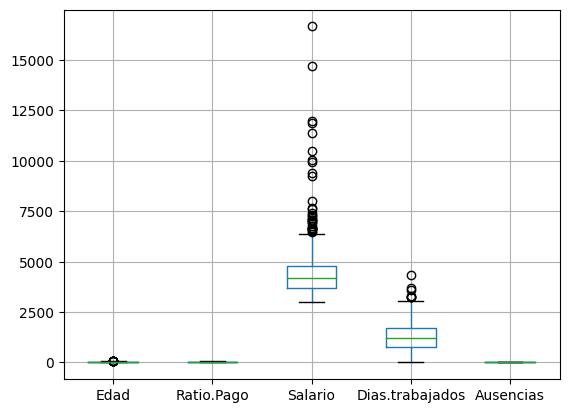

In [27]:
data.boxplot(column=['Edad', 'Ratio.Pago', 'Salario', 'Dias.trabajados', 'Ausencias']) # graficamos los datos para ver si hay valores atipicos
plt.show()

In [28]:
#3. Realice análisis de cómo se relacionan las variables continuas con la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar 
# significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

desvinculados = data[data['Estado'] == 1] # filtramos los datos de los desvinculados
vinculados = data[data['Estado'] == 0] # filtramos los datos de los vinculados


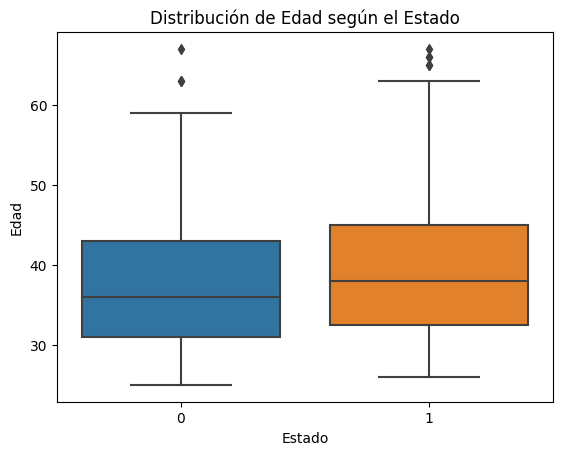

In [31]:
sns.boxplot(x='Estado', y='Edad', data=data) # graficamos la edad de los desvinculados y vinculados
plt.title('Distribución de Edad según el Estado') # titulo del grafico
plt.show()

In [34]:
ttest_ind(desvinculados['Salario'], vinculados['Salario'])

Ttest_indResult(statistic=-0.14717326456812824, pvalue=0.883091552654905)

In [38]:
print(data.columns)


Index(['Estado', 'Edad', 'Ratio.Pago', 'Salario', 'Dias.trabajados',
       'Ausencias', 'Sexo', 'Estado.Civil', 'Departamento', 'Posicion',
       'Desempeño'],
      dtype='object')


Estado    0   1
Sexo           
Female  101  76
Male     82  51


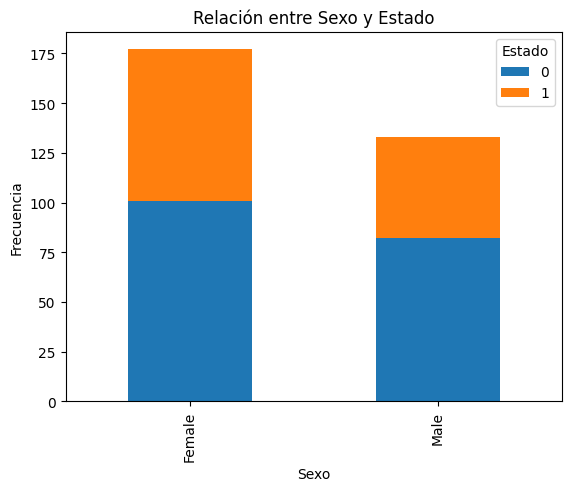

In [39]:
# 4. Realice análisis de cómo se relacionan las variables categóricas con la variable de interés. Acompañe con gráficos y estadísticas. ¿Qué variables pudieran resultar 
# significativas a la hora de modelar la probabilidad de que el trabajador sea desvinculado a la empresa?

tabla_contingencia = pd.crosstab(data['Sexo'], data['Estado'])# creamos una tabla de contingencia
print(tabla_contingencia)

tabla_contingencia.plot(kind='bar', stacked=True)# graficamos la tabla de contingencia
plt.xlabel('Sexo')# etiqueta del eje x
plt.ylabel('Frecuencia')# etiqueta del eje y
plt.title('Relación entre Sexo y Estado')# titulo del grafico
plt.show()

In [40]:
porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100
print(porcentajes)


Estado          0          1
Sexo                        
Female  57.062147  42.937853
Male    61.654135  38.345865


In [46]:
print(data.columns)

Index(['Estado', 'Edad', 'Ratio.Pago', 'Salario', 'Dias.trabajados',
       'Ausencias', 'Sexo', 'Estado.Civil', 'Departamento', 'Posicion',
       'Desempeño'],
      dtype='object')


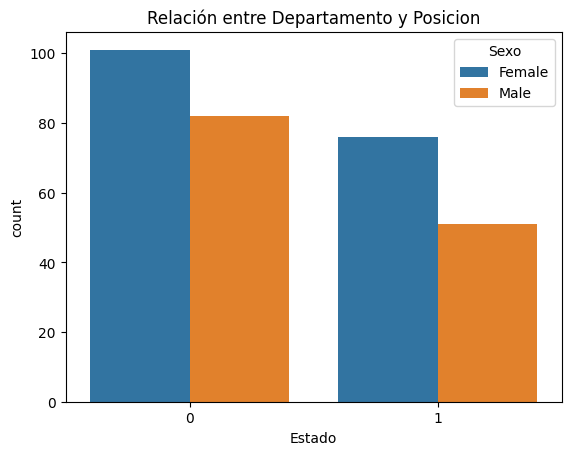

In [50]:
sns.countplot(x='Estado', hue='Sexo', data=data)
plt.title('Relación entre Departamento y Posicion')
plt.show()